In [14]:
import pandas as pd
from random import shuffle  # 引入随机函数shuffle，用来打散数据

In [16]:
data = pd.read_excel('data/model.xls')
data.head()

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0


In [ ]:
data = data.as_matrix()

In [29]:
shuffle(data)    #随机打乱数据

In [30]:
p = 0.8
train = data[:int((len(data)*p)), :]
test = data[int(len(data)*p):, :]

In [42]:
# 导入神经网络初始化函数
from keras.models import Sequential
# 导入神经网络层函数、激活函数
from keras.layers.core import Dense, Activation

In [43]:
# 构建的神经网络模型存储路径
netfile = 'net.model'

In [46]:
net = Sequential()
net.add(Dense(10, input_dim = 3))
net.add(Activation('relu'))
net.add(Dense(1, input_dim = 10))
net.add(Activation('sigmoid'))
net.compile(loss = 'binary_crossentropy', optimizer = 'adam', class_mode = 'binary')

In [47]:
net.fit(train[:,:3], train[:,3], epochs = 1000, batch_size = 1)
net.save_weights(netfile)

E:\Anaconda\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:2250: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1000
232/232 [==============================] - 1s - loss: 0.9677     
Epoch 2/1000
232/232 [==============================] - 0s - loss: 0.6350     
Epoch 3/1000
232/232 [==============================] - 0s - loss: 0.5864     
Epoch 4/1000
232/232 [==============================] - 0s - loss: 0.5498     
Epoch 5/1000
232/232 [==============================] - 0s - loss: 0.5231     
Epoch 6/1000
232/232 [==============================] - 0s - loss: 0.4896     
Epoch 7/1000
232/232 [==============================] - 0s - loss: 0.4612     
Epoch 8/1000
232/232 [==============================] - 0s - loss: 0.4351     
Epoch 9/1000
232/232 [==============================] - 0s - loss: 0.4135     
Epoch 10/1000
232/232 [==============================] - 0s - loss: 0.3946     
Epoch 11/1000
232/232 [==============================] - 0s - loss: 0.3782     
Epoch 12/1000
232/232 [==============================] - 0s - loss: 0.3629     
Epoch 13/1000
232/232 [==========================

In [48]:
predict_reslut = net.predict_classes(train[:,:3]).reshape(len(train))

 32/232 [===>..........................] - ETA: 0s

E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:2250: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


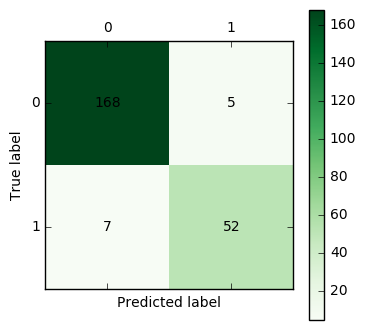

In [49]:
from cm_plot import *
cm_plot(train[:,3], predict_reslut).show()

## CART决策树

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
treefile = 'tree.pkl'
tree = DecisionTreeClassifier()
tree.fit(train[:,:3], train[:,3])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
# 保存模型
from sklearn.externals import joblib
joblib.dump(tree, treefile)

['tree.pkl',
 'tree.pkl_01.npy',
 'tree.pkl_02.npy',
 'tree.pkl_03.npy',
 'tree.pkl_04.npy']

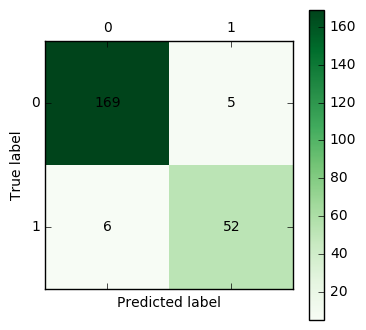

In [57]:
from cm_plot import *
cm_plot(train[:,3], tree.predict(train[:,:3])).show()

## 模型评价

In [62]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [59]:
predict_reslut = net.predict_classes(test[:, :3]).reshape(len(test))

32/59 [===============>..............] - ETA: 0s

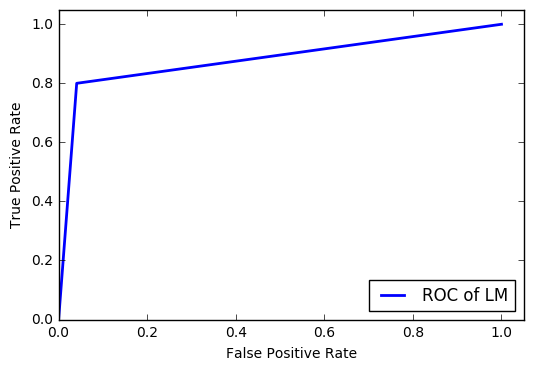

In [63]:
fpr, tpr, thresholds = roc_curve(test[:,3], predict_reslut, pos_label=1)
plt.plot(fpr, tpr, linewidth = 2, label = "ROC of LM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
plt.legend(loc=4)
plt.show()

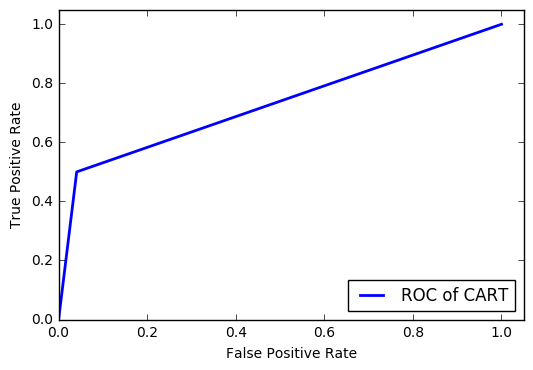

In [77]:
tree_predict_reslut = tree.predict(test[:, :3])
fpr, tpr, thresholds = roc_curve(test[:,3], tree_predict_reslut, pos_label=1)
plt.plot(fpr, tpr, linewidth = 2, label = "ROC of CART")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
plt.legend(loc=4)
plt.show()

In [75]:
tree_predict_reslut = tree.predict(test[:, :3])

In [76]:
tree_predict_reslut

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)